<a href="https://colab.research.google.com/github/andmartins7/NLP/blob/main/Classifica%C3%A7%C3%A3o_de_texto_Identifica%C3%A7%C3%A3o_de_misoginia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação de texto- Identificação de misoginia**

**Competição 2: Classificação de textos com relação a presença ou não de conteúdo misógino.**
(Nessa competição, ficamos em primeiro lugar)

**Alunos:**
*   André Luis Martins Pereira - 201609807
*   João Pedro Melo Teixeira - 201905493

# **Pré-processamento**

Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import en_core_web_sm

spc_en = en_core_web_sm.load()

In [ ]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train.head()

,id,misogynous,text
0,0,0,ME: WORKING REMOTELY DOING THE CHORES DOING GR...
1,1,1,imgilip.com Divorce Childrens well-being Woman...
2,2,1,"A GIRL WHO SHOWS A LOT, HAS LITTLE TO OFFER"
3,3,1,Feminist: we can do everything that men do Men...
4,4,1,r/ConservativeMemes Posted by u/undue-influenc...


In [ ]:
df_test.head()

,id,text
0,7496,GOT A GIRL WITH A BIG BOOTY SO I CALL HER BIG ...
1,7500,SEE GUY RAPING GIRL visue GIVE THE RAPIST A TA...
2,7501,I CAME TO THE STORE TO GET A LOAF OF BREAD. im...
3,7503,i THEHOOKSITE.COM Porn Star Says She'll Have S...
4,7504,imgflip.com OH MOSBY adidas WHAT HAPPENED TO Y...


In [ ]:
print("Positiva \n")
print(df_train.text[189])

Positiva 

You picked the wrong house template YOU PICKED THE WRONG HOUSE FOOL


In [ ]:
print("Negativa \n")
print(df_train.text[7495])

Negativa 

BECAME ADDICTED TO SOAP 2 YEARS AGO imgflip.com I AM CLEAN NOW


In [ ]:
print(df_train.misogynous.value_counts())

0    3750
1    3750
Name: misogynous, dtype: int64


Pré-processamento do texto

In [ ]:
import nltk
nltk.download('all')
from nltk.corpus import stopwords

stopwords = stopwords.words("english")
stopwords

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

E verificamos se há textos duplicados:

In [ ]:
df_train.loc[df_train.duplicated(subset='text', keep=False)==True].sort_values(by='text').head(10)

,id,misogynous,text
338,338,1,"1ST WAVE FEMINISM ""We want to be equal to men""..."
890,890,1,"1ST WAVE FEMINISM ""We want to be equal to men""..."
2778,2778,0,Aww thanks.. Hope you find her lol I need a wo...
3264,3264,0,Aww thanks.. Hope you find her lol I need a wo...
3466,3466,0,Bird: *sings mating call* Me: *repeats it* Bir...
4674,4674,0,Bird: *sings mating call* Me: *repeats it* Bir...
3328,3328,0,Call the ambulance! But not for me!
2481,2481,0,Call the ambulance! But not for me!
5944,5944,1,"From this point on, all your opinions are reje..."
5861,5861,1,"From this point on, all your opinions are reje..."


Em seguida, retiramos as duplicatas:

In [ ]:
df_train = df_train.drop_duplicates(subset='text', keep='first')
df_train.shape

(7462, 3)

In [ ]:
def limpa_texto(texto):
  '''(str) -> str
  Essa funcao recebe uma string, deixa tudo em minusculo, filtra apenas letras,
  retira stopwords, lemmatiza e retorna a string resultante.
  '''
  texto = texto.lower()

  texto = re.sub(r"[\W\d_]+", " ", texto)

  texto = [pal for pal in texto.split() if pal not in stopwords]

  spc_texto = spc_en(" ".join(texto))
  tokens = [word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in spc_texto]
  
  return " ".join(tokens)

In [ ]:
df_train['text'] = df_train['text'].apply(limpa_texto)
df_test['text'] = df_test['text'].apply(limpa_texto)

In [ ]:
df_train.head()

,id,misogynous,text
0,0,0,work remotely chore grocery ps beep wife wife
1,1,1,imgilip com divorce children well woman happy ...
2,2,1,girl show lot little offer
3,3,1,feminist everything man man make mematic observe
4,4,1,r conservativememe post u undue influence h re...


In [ ]:
# rode essa celula se quiser salvar o dataset pre-processado
df_train.to_csv('misoginia_train_preprocessado.csv', index= False, columns= ['id', 'misogynous', 'text'])
df_test.to_csv('misoginia_test_preprocessado.csv', index= False, columns= ['id', 'text'])

# **Feature extraction**

Vamos testar dois métodos: Bag of Words com um vetor de componentes binários ou TF-IDF.

### Com Bag of Words

In [ ]:
# Importando o CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Instanciando o CountVectorizer, binary=True faz a codificacao binaria
vectorizer = CountVectorizer(binary=True, max_features=5000)

texto = df_train['text']

# Vetorizando o texto
X_bow = vectorizer.fit_transform(texto)

In [ ]:
X_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print(X_bow.shape, type(X_bow))

(7462, 5000) <class 'scipy.sparse.csr.csr_matrix'>


### Com TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Instanciando o TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_features=5000)

# Vetorizando
X_tfidf = tfidf_vect.fit_transform(texto)

In [ ]:
print(X_tfidf)

  (0, 4804)	0.44057783700681447
  (0, 440)	0.4501823277537746
  (0, 3483)	0.39840811775729523
  (0, 1719)	0.43195064217065576
  (0, 811)	0.4403032680968134
  (0, 4854)	0.2530803980028934
  (1, 1475)	0.2357053967738041
  (1, 1472)	0.45837625353442063
  (1, 1780)	0.3203694035628723
  (1, 4841)	0.15758939727683774
  (1, 4766)	0.2543079275597613
  (1, 800)	0.44831738166222734
  (1, 1189)	0.3877057872723319
  (1, 879)	0.13698226453506987
  (1, 2011)	0.41487623245049116
  (2, 3042)	0.547904512912149
  (2, 2448)	0.4432613073675094
  (2, 2490)	0.4884701153473764
  (2, 4004)	0.4171859166683562
  (2, 1669)	0.30111943721296264
  (3, 3023)	0.5834277773351039
  (3, 2653)	0.3507931013973254
  (3, 2542)	0.240626777370387
  (3, 2555)	0.474021697874268
  (3, 1378)	0.4172261458394292
  :	:
  (7457, 99)	0.37912119758566504
  (7457, 435)	0.35560146889500616
  (7457, 835)	0.2841575956677348
  (7457, 4909)	0.2926876624858059
  (7457, 2010)	0.22853370430493822
  (7457, 879)	0.15289608944209546
  (7458, 1629)

# **Modelos**

Primeiro, é preciso dividir os dados em base de treino (70%) e teste (30%).

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_bow, df_train['misogynous'],
                                                        test_size=0.3, random_state = 10)

X2_train, X2_test, y2_train, y2_test = train_test_split(X_tfidf, df_train['misogynous'],
                                                        test_size=0.3, random_state = 10)

In [ ]:
print(X1_train.shape,y1_train.shape)

(5223, 5000) (5223,)


Importando as métricas que serão usadas para avaliação de cada modelo:

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score

In [ ]:
def mostra_metricas(y_true, y_pred):
  ''' Função que recebe o y real, o y predito e mostra as
  principais metricas.
  '''
  print("Acurácia: ", accuracy_score(y_true, y_pred))
  print("\nAUROC:", roc_auc_score(y_true, y_pred))
  print("\nF1-Score:", f1_score(y_true, y_pred, average='weighted'))
  print("\nMatriz de confusão:")
  sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)
  plt.show()

## Regressão Logística

### Texto vetorizado com Bag of Words

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Instanciando a reg. logistica
reglog = LogisticRegression()

# Aplicando o modelo
reglog.fit(X1_train, y1_train)

LogisticRegression()

In [ ]:
# Predicao
y1_reglog_pred = reglog.predict(X1_test)

Vamos agora analisar as métricas:

Acurácia:  0.7780259044216168

AUROC: 0.7785924866575054

F1-Score: 0.7780916241762619

Matriz de confusão:


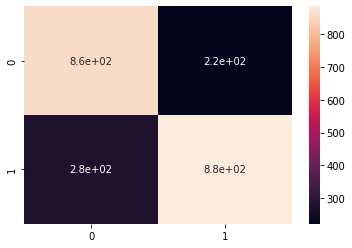

In [ ]:
mostra_metricas(y1_test, y1_reglog_pred)

### Texto vetorizado com tf-idf

In [ ]:
reglog2 = LogisticRegression()

reglog2.fit(X2_train, y2_train)

y2_reglog_pred = reglog2.predict(X2_test)

Acurácia:  0.7820455560518088

AUROC: 0.7833454507685915

F1-Score: 0.7819731195321693

Matriz de confusão:


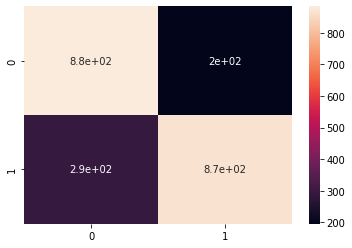

In [ ]:
mostra_metricas(y2_test, y2_reglog_pred)

A diferença do desempenho do modelo com os 2 métodos de feature extraction é pouca, mas todas as métricas apontam que ele foi melhor com tf-idf.

## Naive Bayes Multinomial

### BoW

In [ ]:
from sklearn.naive_bayes import MultinomialNB

Acurácia:  0.7713264850379634

AUROC: 0.7705738071649996

F1-Score: 0.7711869373322616

Matriz de confusão:


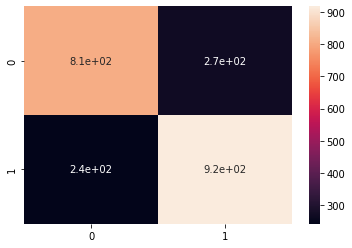

In [ ]:
nb1 = MultinomialNB()

nb1.fit(X1_train.toarray(), y1_train)

y1_gnb_pred = nb1.predict(X1_test.toarray())

mostra_metricas(y1_test, y1_gnb_pred)

### Tf-idf

Acurácia:  0.7744528807503349

AUROC: 0.77401169665399

F1-Score: 0.7744163787723028

Matriz de confusão:


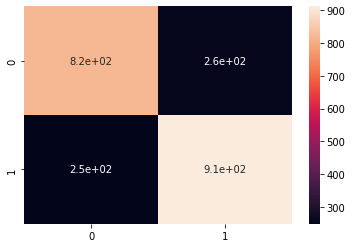

In [ ]:
nb2 = MultinomialNB()

nb2.fit(X2_train.toarray(), y2_train)

y2_gnb_pred = nb2.predict(X2_test.toarray())

mostra_metricas(y2_test, y2_gnb_pred)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### BoW

Acurácia:  0.7574810183117463

AUROC: 0.757600028762264

F1-Score: 0.7575515928042674

Matriz de confusão:


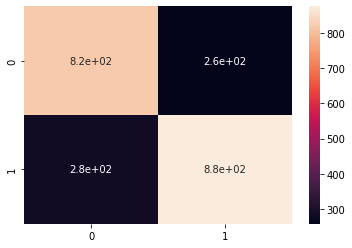

In [ ]:
rf1 = RandomForestClassifier()

rf1.fit(X1_train, y1_train)

y1_dt_pred = rf1.predict(X1_test)

mostra_metricas(y1_test, y1_dt_pred)

### Tf-idf

Acurácia:  0.7650736936132202

AUROC: 0.764959972516059

F1-Score: 0.7651125324709876

Matriz de confusão:


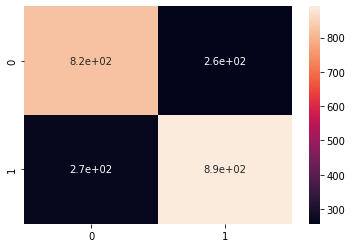

In [ ]:
rf2 = RandomForestClassifier()

rf2.fit(X2_train, y2_train)

y2_dt_pred = rf2.predict(X2_test)

mostra_metricas(y2_test, y2_dt_pred)

# **Resultados**

Para todos os modelos, a diferença entre usar Bag of Words ou TF-IDF foi bem pequena. Os modelos apresentaram melhores métricas com TF-IDF, com exceção do Naive Bayes.

O melhor modelo foi a regressão logística (com TF-IDF), com acurácia, F1 e AUROC de 78% (arredondando). Vamos testá-lo com o df_test:

In [ ]:
def nova_predicao(texto):
  '''Funcao que recebe uma string e printa a pedicao feita
  pelo modelo reglog2.'''
  texto_vetorizado = tfidf_vect.transform([texto])
  pred = reglog2.predict(texto_vetorizado)

  if pred == 0:
    print("Esse é um texto não misógeno.")
  else:
    print("Esse é um texto misógeno.")

In [ ]:
nova_predicao("GOT A GIRL WITH A BIG BOOTY SO I CALL HER BIG")

Esse é um texto misógeno.


In [ ]:
texto_vetorizado = tfidf_vect.transform(df_test.text)
y_pred_lr = reglog2.predict(texto_vetorizado)

submission = pd.DataFrame({
    "id": df_test.id,
    "misogynous": y_pred_lr
})

In [ ]:
# gerar arquivo csv
submission.to_csv('./submission_lr_2.csv', index=False)